# Week 2 Individual Assignment

In this notebook I will be exploring LA Neighborhood data which I downloaded from [the LA Times Mapping LA Boundaries page](http://boundaries.latimes.com/sets/) and uploaded to the "data" folder. Through the exploration of this data set, I will be learning how to use the basics of JupyterHub Notebooks. 

I'm going to explore these commands:
- `.shape`
- `.info`
- `.head()`
- `.value_counts()`
- `.query`
- `.plot()`

## Importing my dataset and geopandas module
First, I will import the geopandas module. 

In [2]:
import geopandas as gpd

Next, I will access my dataset which contains the exact parameters of every neighborhood in Los Angeles as defined by the LA Times. I will save the data as the variable `barrios` porque estoy practicando mi español. 

In [3]:
barrios = gpd.read_file('data/LA_County_Neighborhood_V2.shp')

## Exploring the dataset
Okay, now that that is done, I will explore the data!
First things first, what is the basic shape of the dataset? I will use `.shape` command to find the rows and columns of the set. 

In [4]:
print('The dataset is', barrios.shape[0],'rows and',barrios.shape[1],'columns.')

The dataset is 113 rows and 9 columns.


Using the `print()` command I can make a sentence using output from `.shape`. Next, I will use `.info()` to get a more in depth look at the dataset. 

In [5]:
barrios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   slug        113 non-null    object  
 1   set         113 non-null    object  
 2   kind        113 non-null    object  
 3   external_i  113 non-null    object  
 4   name        113 non-null    object  
 5   display_na  113 non-null    object  
 6   name_1      0 non-null      object  
 7   slug_1      0 non-null      object  
 8   geometry    113 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 8.1+ KB


This tells me the name of each column and the number of null and non-null outputs per column. It also tells me the data types for each column. This dataset does not contain any integers, just strings and geometry types. 

This dataset has a bunch of columns that we don't need. So I'll trim the data to just two simple columns that contain the name of the neighborhood and the location and save that under the new variable `barrios_trimed`. Then I'll use the `.head()` command to display the first 5 rows of the trimmed dataset. 

In [6]:
two_columns = ['name','geometry']
barrios_trimmed = barrios[two_columns]
barrios_trimmed.head()

,name,geometry
0,Adams-Normandie,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
1,Arleta,"POLYGON ((-118.42592 34.22170, -118.42781 34.2..."
2,Arlington Heights,"POLYGON ((-118.31591 34.05261, -118.31341 34.0..."
3,Atwater Village,"POLYGON ((-118.27700 34.15325, -118.27566 34.1..."
4,Baldwin Hills/Crenshaw,"POLYGON ((-118.35626 34.02484, -118.35501 34.0..."


Great. Now,  if I want to explore the number of times each value appears in a column, I can use the `.value_counts()` command.

In [7]:
barrios_trimmed['name'].value_counts()

Montecito Heights    1
Sepulveda Basin      1
Beverlywood          1
Larchmont            1
Watts                1
                    ..
Rancho Park          1
North Hills          1
Westchester          1
Westlake             1
Leimert Park         1
Name: name, Length: 113, dtype: int64

Because this dataset is a list of every neighborhood in LA, there aren't any repeats and every count is 1. This makes a very long list and so `.value_counts()` shows the first five and last five neighborhoods in the list. 
 
I can also check the data for a specific neighborhood. Here, I'm using `.query` to check for the neighboorhoods of Los Feliz and Koreatown.

In [8]:
barrios_trimmed.query("name == 'Los Feliz' | name == 'Koreatown'")

,name,geometry
51,Koreatown,"POLYGON ((-118.28691 34.07651, -118.28681 34.0..."
57,Los Feliz,"POLYGON ((-118.27321 34.11841, -118.27191 34.1..."


## Mapping the data

I can show a basic visual representation of the dataset by using `.plot()` which interprets the geometry data type in the second column as a graph that can be plotted. This makes a basic map:

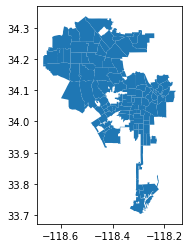

In [9]:
barrios_trimmed.plot()

With a little tweaking, we can make the map colorful and a little bigger.

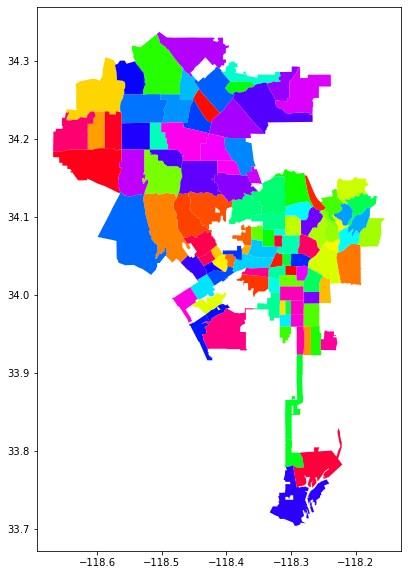

In [86]:
barrios_trimmed.plot(cmap='hsv', figsize=(10,10))

# Thank you!